# OASIS INFOBYTE

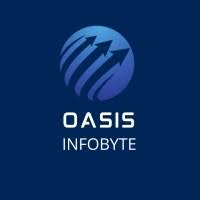

## CAR PRICE PREDICTION WITH MACHINE LEARNING

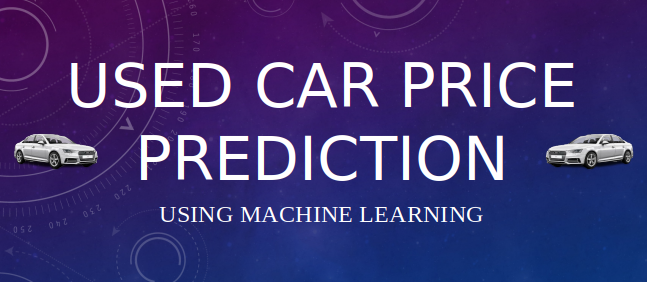

###### objective

Is to train a car price prediction model 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("C:\\Users\\DIYANN\\Downloads\\car data.csv")
data

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


##### ABOUT DATASET

###### The price of a car depends on a lot of factors like the goodwill of the brand of the car, features of the car, horsepower and the mileage it gives and many more. Car price prediction is one of the major research areas in machine learning. So if you want to learn how to train a car price prediction model

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [4]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [5]:
print(data.Fuel_Type.value_counts())
print(data.Selling_type.value_counts())
print(data.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Selling_type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [6]:
data.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
data.corr()

C:\Users\DIYANN\AppData\Local\Temp\ipykernel_6820\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Year,Selling_Price,Present_Price,Driven_kms,Owner
Year,1.000000,0.236141,-0.047192,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878914,0.029187,-0.088344
Present_Price,-0.047192,0.878914,1.000000,0.203618,0.008058
Driven_kms,-0.524342,0.029187,0.203618,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008058,0.089216,1.000000


C:\Users\DIYANN\AppData\Local\Temp\ipykernel_6820\94923637.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


<Axes: >

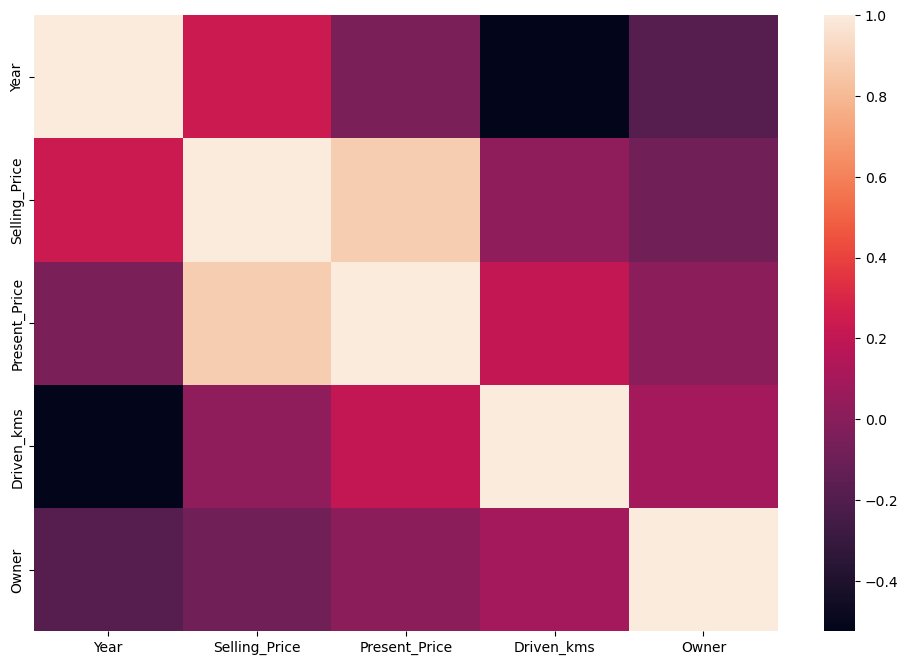

In [8]:
fig, ax = plt.subplots(figsize=(12,8))   
sns.heatmap(data.corr())

C:\Users\DIYANN\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: 

The `vertical` parameter is deprecated; assigning data to `x`.
This will become an error in seaborn v0.13.0; please update your code.

  func(x=vector, **plot_kwargs)
C:\Users\DIYANN\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.05`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  func(x=vector, **plot_kwargs)
C:\Users\DIYANN\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
C:\Users\DIYANN\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: 

The `vertical` parameter is deprecated; assigning data to `x`.
This will

<Figure size 900x900 with 0 Axes>

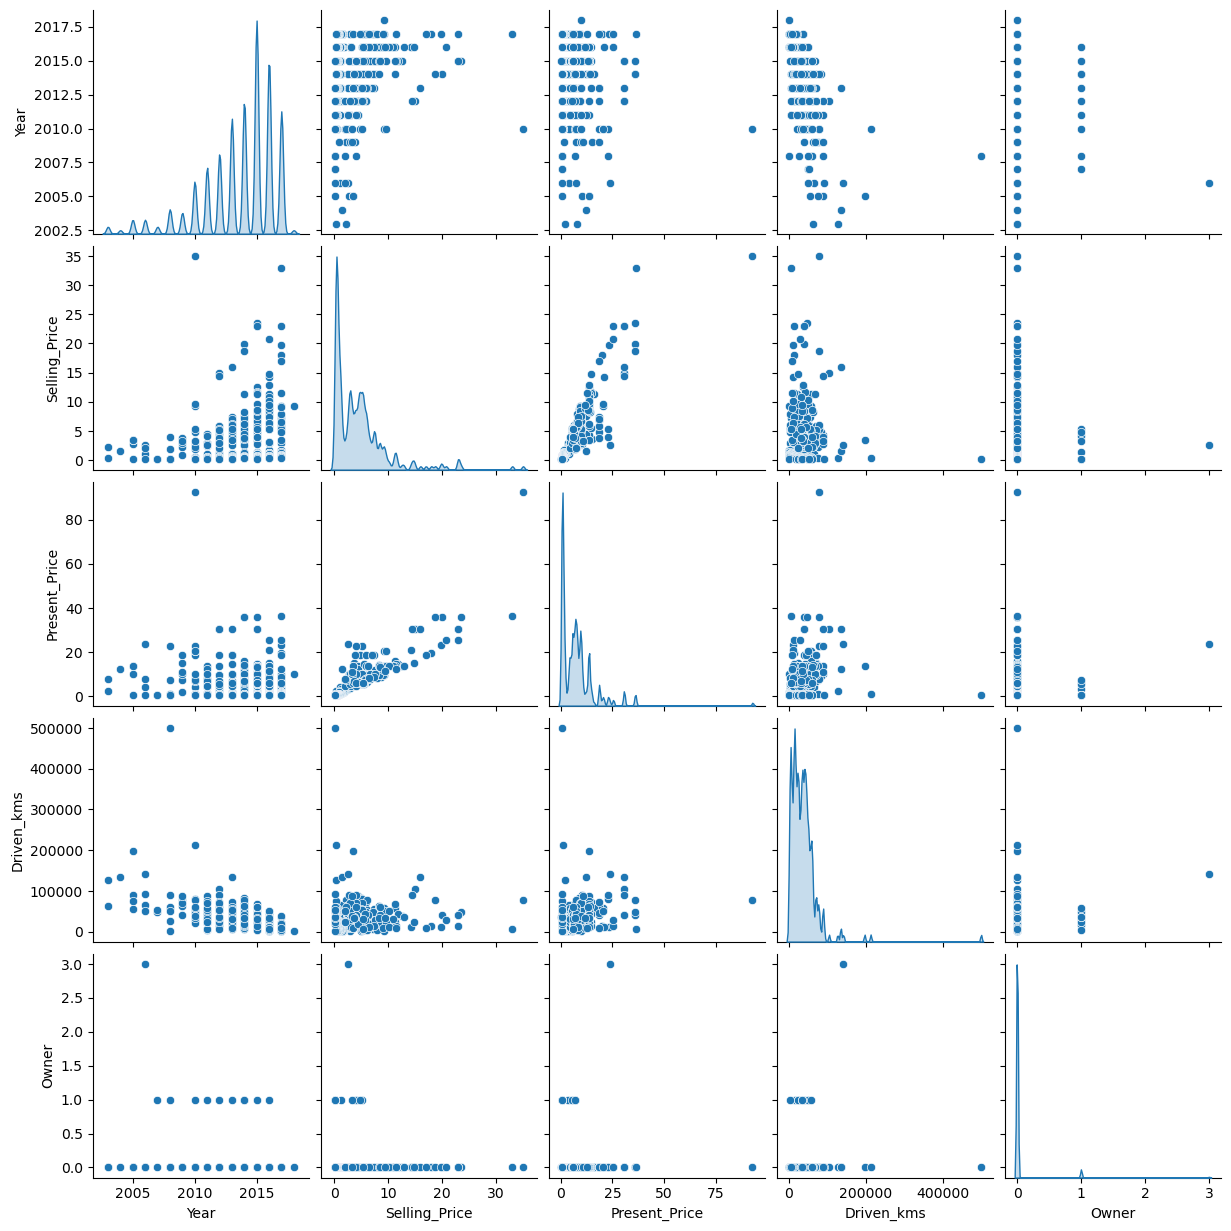

In [9]:
plt.figure(figsize=(9,9))
sns.pairplot(data,diag_kind="kde", diag_kws=dict(shade=True, bw=.05, vertical=False))
plt.show()

<BarContainer object of 301 artists>

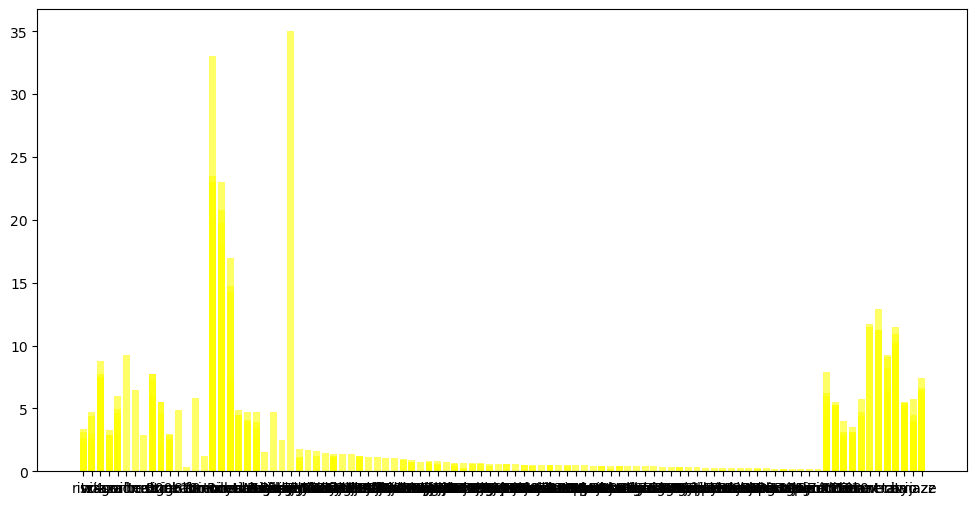

In [10]:
plt.figure(figsize=(12, 6))
plt.bar(data['Car_Name'], data['Selling_Price'], label='Selling Price', alpha=0.6,color = 'yellow')


<BarContainer object of 301 artists>

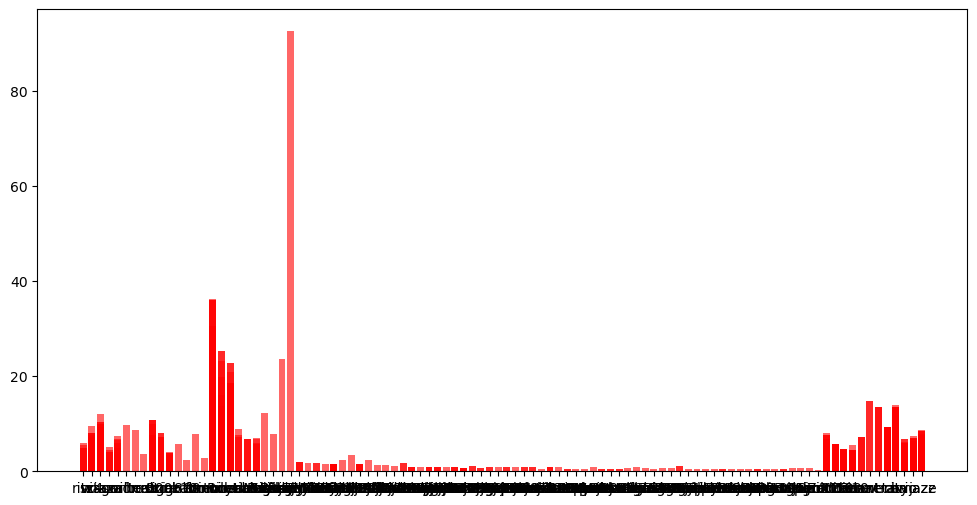

In [11]:
plt.figure(figsize=(12, 6))
plt.bar(data['Car_Name'], data['Present_Price'], label='Present Price', alpha=0.6,color = 'Red')

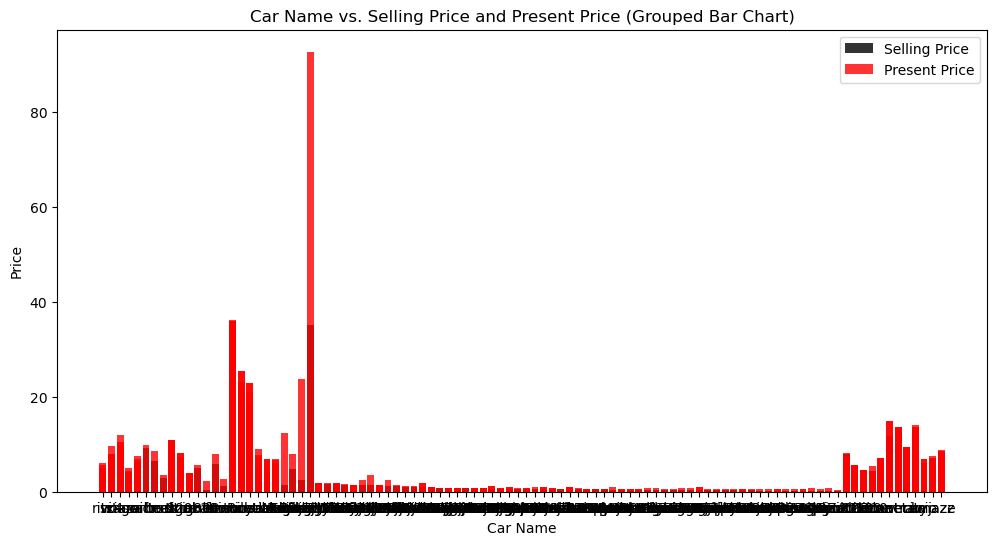

In [12]:
car_names = data['Car_Name']
selling_prices = data['Selling_Price']
present_prices = data['Present_Price']

# Create a figure
plt.figure(figsize=(12, 6))

# Combine both bar charts into one
plt.bar(car_names, selling_prices, label='Selling Price', alpha=0.8, color='black')
plt.bar(car_names, present_prices, label='Present Price', alpha=0.8, color='red')

plt.xlabel('Car Name')
plt.ylabel('Price')
plt.legend()
plt.title('Car Name vs. Selling Price and Present Price (Grouped Bar Chart)')

# Show the plot
plt.show()

In [13]:
sorted_by_selling_price = data.sort_values(by='Selling_Price', ascending=False)
sorted_by_present_price = data.sort_values(by='Present_Price', ascending=False)

# Select the top 10 cars in each category
top_10_selling_price = sorted_by_selling_price.head(10)
top_10_present_price = sorted_by_present_price.head(10)

# Display the top 10 cars based on Selling Price
print("Top 10 Cars by Selling Price:")
print(top_10_selling_price)

# Display the top 10 cars based on Present Price
print(top_10_present_price)


Top 10 Cars by Selling Price:
        Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
86  land cruiser  2010          35.00          92.60       78000    Diesel   
64      fortuner  2017          33.00          36.23        6000    Diesel   
63      fortuner  2015          23.50          35.96       47000    Diesel   
82        innova  2017          23.00          25.39       15000    Diesel   
51      fortuner  2015          23.00          30.61       40000    Diesel   
93      fortuner  2015          23.00          30.61       40000    Diesel   
96        innova  2016          20.75          25.39       29000    Diesel   
59      fortuner  2014          19.99          35.96       41000    Diesel   
66        innova  2017          19.75          23.15       11000    Petrol   
62      fortuner  2014          18.75          35.96       78000    Diesel   

   Selling_type Transmission  Owner  
86       Dealer       Manual      0  
64       Dealer    Automatic      0

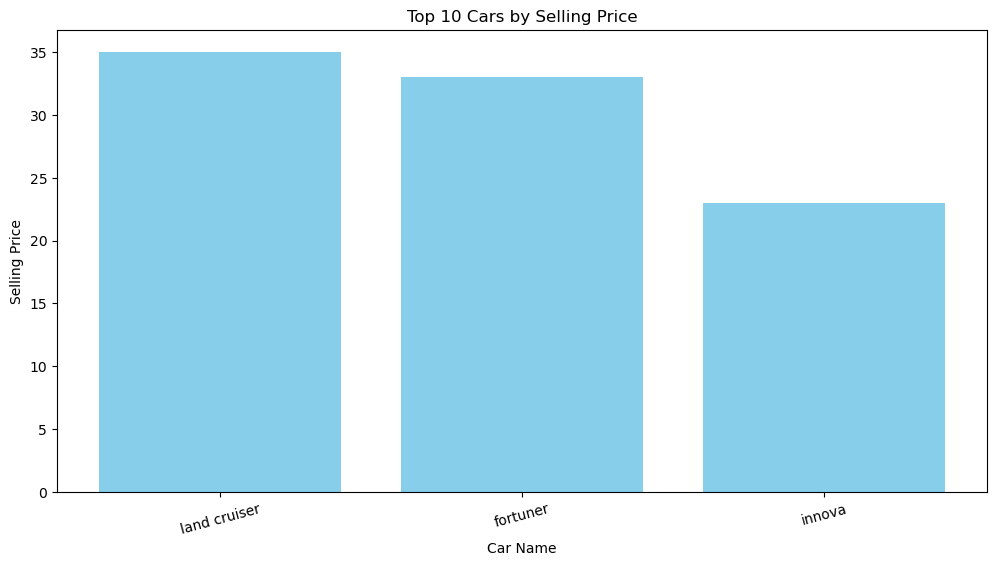

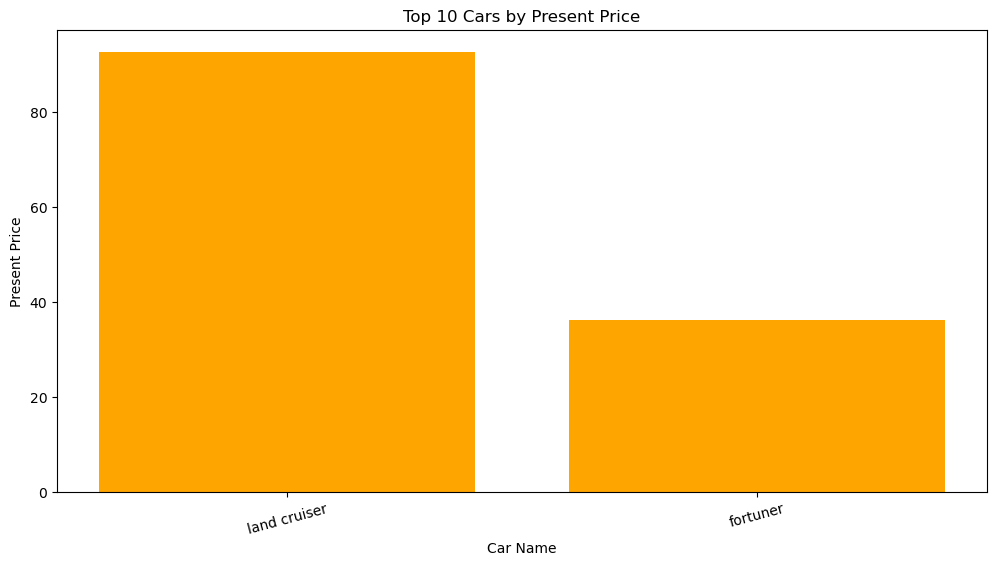

In [14]:
#Create a bar chart for the top 10 cars by Selling Price
plt.figure(figsize=(12, 6))
plt.bar(top_10_selling_price['Car_Name'], top_10_selling_price['Selling_Price'], color='skyblue')
plt.xlabel('Car Name')
plt.ylabel('Selling Price')
plt.xticks(rotation=15)
plt.title('Top 10 Cars by Selling Price')
plt.show()

#Create a bar chart for the top 10 cars by Present Price
plt.figure(figsize=(12, 6))
plt.bar(top_10_present_price['Car_Name'], top_10_present_price['Present_Price'], color='orange')
plt.xlabel('Car Name')
plt.ylabel('Present Price')
plt.xticks(rotation=15)
plt.title('Top 10 Cars by Present Price')
plt.show()


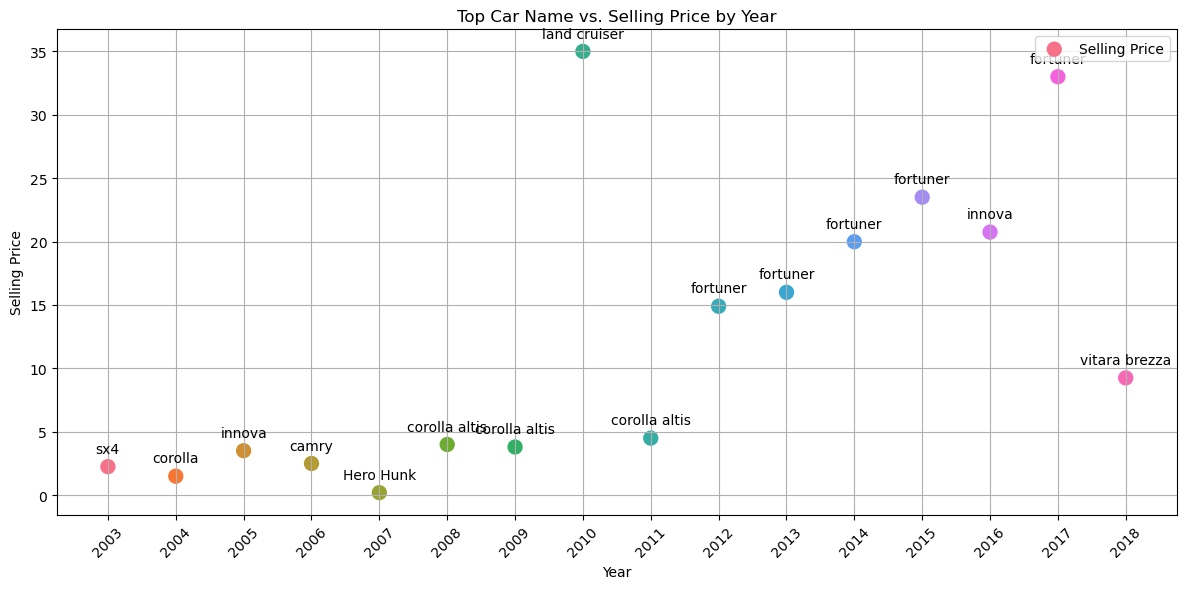

In [15]:
# Find the top car name for each year based on the highest selling price
top_cars_by_year = data.groupby('Year').apply(lambda x: x.loc[x['Selling_Price'].idxmax()])

# Define a custom color palette for the points
colors = sns.color_palette("husl", n_colors=len(top_cars_by_year))

# Create a plot
plt.figure(figsize=(12, 6))
plt.scatter(top_cars_by_year['Year'], top_cars_by_year['Selling_Price'], c=colors, label='Selling Price', s=100)
plt.xticks(top_cars_by_year['Year'], rotation=45)
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.title('Top Car Name vs. Selling Price by Year')
plt.legend()
plt.grid(True)

# Annotate the top car name for each year
for i, row in top_cars_by_year.iterrows():
    plt.annotate(row['Car_Name'], (row['Year'], row['Selling_Price']), textcoords="offset points", xytext=(0,10), ha='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()

In [16]:
highest_selling_car = data.loc[data['Selling_Price'].idxmax()]

# Display the information about the car with the highest selling price
print("Car with the Highest Selling Price:")
print(highest_selling_car)

Car with the Highest Selling Price:
Car_Name         land cruiser
Year                     2010
Selling_Price            35.0
Present_Price            92.6
Driven_kms              78000
Fuel_Type              Diesel
Selling_type           Dealer
Transmission           Manual
Owner                       0
Name: 86, dtype: object


In [17]:
# Sort the data by Selling_Price and Driven_kms and get the top 20 cars
top_20_cars = data.sort_values(by=['Selling_Price', 'Driven_kms'], ascending=[False, True]).head(20)

# Calculate summary statistics
avg_selling_price = top_20_cars['Selling_Price'].mean()
avg_driven_kms = top_20_cars['Driven_kms'].mean()
print(avg_selling_price)
print(avg_driven_kms)

19.313499999999998
44493.8


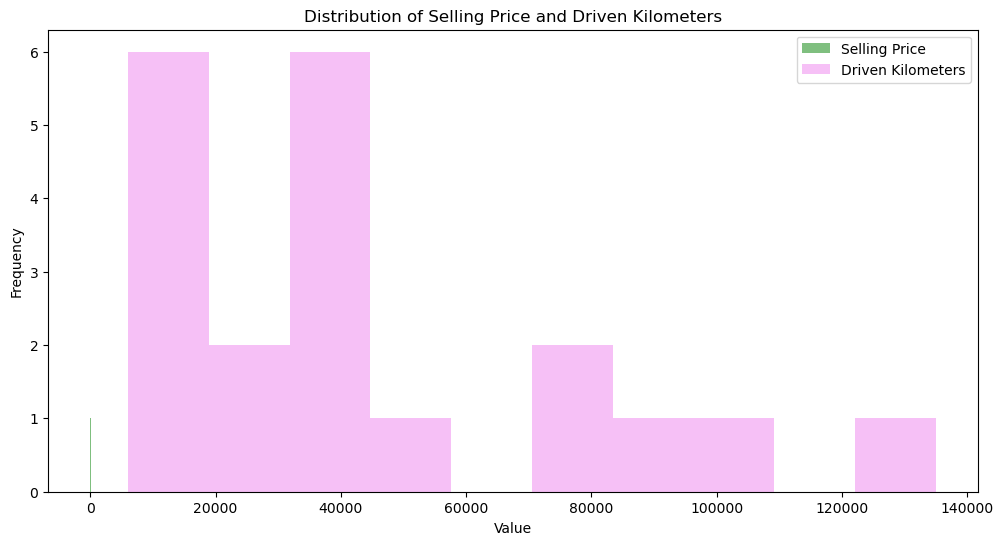

In [18]:
# Create histograms to visualize the distributions
plt.figure(figsize=(12, 6))
plt.hist(top_20_cars['Selling_Price'], bins=10, alpha=0.5, label='Selling Price',color = 'Green')
plt.hist(top_20_cars['Driven_kms'], bins=10, alpha=0.5, label='Driven Kilometers',color = 'Violet')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Selling Price and Driven Kilometers')
plt.legend()
plt.show()


In [42]:


data = pd.get_dummies(data, columns=['Selling_type'],prefix=['Selling_type'])


In [43]:
data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Owner', 'Fuel_Type_CNG', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol',
       'Transmission_Automatic', 'Transmission_Manual', 'Selling_type_Dealer',
       'Selling_type_Individual'],
      dtype='object')

In [44]:
y=np.array(data['Selling_Price'])
x=np.array(data.drop(["Selling_Price","Car_Name"],axis=1))

In [45]:
print(x),print(y)

[[2.0140e+03 5.5900e+00 2.7000e+04 ... 1.0000e+00 1.0000e+00 0.0000e+00]
 [2.0130e+03 9.5400e+00 4.3000e+04 ... 1.0000e+00 1.0000e+00 0.0000e+00]
 [2.0170e+03 9.8500e+00 6.9000e+03 ... 1.0000e+00 1.0000e+00 0.0000e+00]
 ...
 [2.0090e+03 1.1000e+01 8.7934e+04 ... 1.0000e+00 1.0000e+00 0.0000e+00]
 [2.0170e+03 1.2500e+01 9.0000e+03 ... 1.0000e+00 1.0000e+00 0.0000e+00]
 [2.0160e+03 5.9000e+00 5.4640e+03 ... 1.0000e+00 1.0000e+00 0.0000e+00]]
[ 3.35  4.75  7.25  2.85  4.6   9.25  6.75  6.5   8.75  7.45  2.85  6.85
  7.5   6.1   2.25  7.75  7.25  7.75  3.25  2.65  2.85  4.9   4.4   2.5
  2.9   3.    4.15  6.    1.95  7.45  3.1   2.35  4.95  6.    5.5   2.95
  4.65  0.35  3.    2.25  5.85  2.55  1.95  5.5   1.25  7.5   2.65  1.05
  5.8   7.75 14.9  23.   18.   16.    2.75  3.6   4.5   4.75  4.1  19.99
  6.95  4.5  18.75 23.5  33.    4.75 19.75  9.25  4.35 14.25  3.95  4.5
  7.45  2.65  4.9   3.95  5.5   1.5   5.25 14.5  14.73  4.75 23.   12.5
  3.49  2.5  35.    5.9   3.45  4.75  3.8  11.25

(None, None)

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
print("Dimensions of x train: ",x_train.shape)
print("Dimensions of x test: ",x_test.shape)
print("Dimensions of y train: ",y_train.shape)
print("Dimensions of y test: ",y_test.shape)

Dimensions of x train:  (240, 11)
Dimensions of x test:  (61, 11)
Dimensions of y train:  (240,)
Dimensions of y test:  (61,)


In [47]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor()

In [48]:
regressor.fit(x,y)

RandomForestRegressor()

In [49]:
regressor.score(x_train,y_train)

0.9896757741476216

In [50]:
regressor.score(x_test,y_test)

0.9894220364494045

In [51]:
from sklearn.metrics import accuracy_score
predictions=regressor.predict(x_test)
percentage=regressor.score(x_test,y_test)
percentage

0.9894220364494045

In [52]:
print(regressor.score(x_train,y_train))
print(f"test set:{len(x_test)}")
print(f"Accuracy={percentage*100}%")

0.9896757741476216
test set:61
Accuracy=98.94220364494045%
